In [158]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pickle


In [164]:
FILENAME = "model_heart_mouret.pkl"

In [120]:
data = pd.read_csv('../../heart.csv')

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [122]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [123]:
x = data.drop(columns=['sex'], axis=1)
y = data['sex']

In [124]:
x.head()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

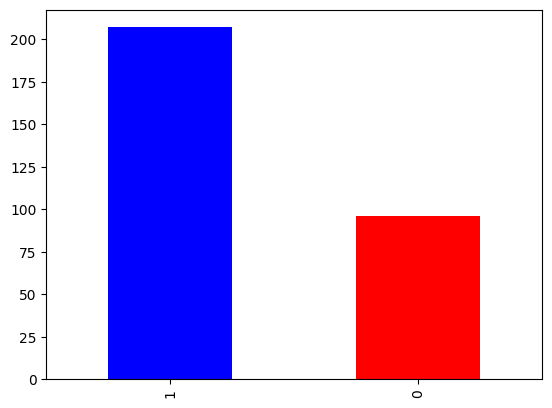

In [125]:
%matplotlib inline 
y.value_counts().plot(kind="bar", color=["blue", "red"])

In [126]:
y = np.array(y)
y

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(random_state=42)

model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_acc_score = accuracy_score(y_test, lr_predict)


print("Accuracy of Logistic Regression:", lr_acc_score*100, '\n')
print(classification_report(y_test, lr_predict))


Accuracy of Logistic Regression: 69.23076923076923 

              precision    recall  f1-score   support

           0       0.41      0.38      0.39        24
           1       0.78      0.81      0.79        67

    accuracy                           0.69        91
   macro avg       0.60      0.59      0.59        91
weighted avg       0.68      0.69      0.69        91



In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=5)

rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)

rf_acc_score = accuracy_score(y_test, rf_predicted)


print("Accuracy of Random Forest:", rf_acc_score*100, '\n')
print(classification_report(y_test, rf_predicted))


Accuracy of Random Forest: 74.72527472527473 

              precision    recall  f1-score   support

           0       0.53      0.33      0.41        24
           1       0.79      0.90      0.84        67

    accuracy                           0.75        91
   macro avg       0.66      0.61      0.62        91
weighted avg       0.72      0.75      0.73        91



In [140]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=20, random_state=42, max_depth=10)

gb.fit(X_train, y_train)
gb_predicted = gb.predict(X_test)

gb_acc_score = accuracy_score(y_test, gb_predicted)

print("Accuracy of Gradient Boosting :", gb_acc_score*100, '\n')
print(classification_report(y_test, gb_predicted))


Accuracy of Gradient Boosting : 76.92307692307693 

              precision    recall  f1-score   support

           0       0.55      0.71      0.62        24
           1       0.88      0.79      0.83        67

    accuracy                           0.77        91
   macro avg       0.72      0.75      0.73        91
weighted avg       0.79      0.77      0.78        91



In [150]:
from sklearn.pipeline import Pipeline

rf_pipeline = [
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=20, random_state=42, max_depth=10))
]


In [151]:
pipe = Pipeline(rf_pipeline)
pipe.fit(X_train, y_train)

Pipeline(steps=[('RandomForestClassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=20,
                                        random_state=42))])

In [154]:
pipe_pref = pipe.predict(X_test)


In [155]:
from sklearn.metrics import f1_score

print("Score : {:2.1f}%".format(f1_score(y_test, pipe_pref) * 100))

Score : 78.8%


In [163]:
with open(FILENAME, 'wb') as file:
    pickle.dump(pipe, file)
